# Pose estimation

- model: yolov8?-pose

## 추론결과
- YOLO Pose는 사람의 주요 관절의 위치 **keypoint 정보**와 사람의 **bounding box** 를 추론한다.
    - keypoints는 Results.keypoints 속성으로 조회한다.
    - bounding box 결과는 Results.boxes 속성으로 조회한다.
- `ultralytics.engine.results.Keypoints`
    - Keypoint 추론 결과 타입 class.
    - https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.Keypoints
- Keypoints 속성
    - **xy:** 각 keypoint 들의 좌표. (사람수, 17:keypoints, 2:좌표)
    - **xyn:** 각 keypoint 들의 normalize 된 좌표. (이미지 크기 대비 비율)
    - **conf:** 각 keypoint들의 confidence score. (사람수, 17)

# Keypoints

![keypoints](https://learnopencv.com/wp-content/uploads/2021/05/fix-overlay-issue.jpg)
<br><center>\<source\>: https://learnopencv.com/wp-content/uploads/2021/05/fix-overlay-issue.jpg</center>

In [1]:
idx2keypoints = ["코", "왼쪽 눈", "오른쪽 눈", "왼쪽 귀", "오른쪽 귀", "왼쪽 어깨", "오른쪽 어깨", "왼쪽 팔꿈치", "오른쪽 팔꿈치", "왼쪽 손목", "오른쪽 손목", "왼쪽 힙", "오른쪽 힙", "왼쪽 무릎", "오른쪽 무릎", "왼쪽 발목", "오른쪽 발목", ]

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [ ]:
# yolo  task=pose  mode=predict  model=models/yolov8n-pose.pt   source=0  show=True

In [5]:
# 한장의 사진 
# model = YOLO("models/yolov8n-pose.pt")
model = YOLO("models/yolov8x-pose.pt")
results = model("03_test_image_pose/pose.jpg", save=True)

100%|██████████████████████████| 133M/133M [00:01<00:00, 84.8MB/s]



image 1/1 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\pose.jpg: 448x640 1 person, 555.1ms
Speed: 2.2ms preprocess, 555.1ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to C:\Classes\DA-35\runs\pose\predict3


In [6]:
# 여러장 사진 - directory 지정. list에 경로들을 묶어서 전달
results2 = model("03_test_image_pose", save=True)
len(results2)


image 1/4 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\1.jpg: 384x640 2 persons, 489.8ms
image 2/4 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\2.jpg: 640x640 2 persons, 782.4ms
image 3/4 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\dumbbell_curls.jpg: 448x640 1 person, 549.2ms
image 4/4 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\pose.jpg: 448x640 1 person, 539.8ms
Speed: 3.4ms preprocess, 590.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to C:\Classes\DA-35\runs\pose\predict3


4

In [7]:
model = YOLO("models/yolov8x-pose.pt")
results3 = model("03_test_image_pose/**/*.jpg", save=True)


image 1/15 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\1.jpg: 384x640 2 persons, 475.6ms
image 2/15 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\2.jpg: 640x640 2 persons, 774.6ms
image 3/15 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\degree\1.jpg: 640x512 1 person, 636.0ms
image 4/15 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\degree\10.jpg: 512x640 1 person, 629.2ms
image 5/15 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\degree\11.jpg: 448x640 1 person, 551.1ms
image 6/15 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\degree\2.jpg: 448x640 1 person, 548.1ms
image 7/15 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\degree\3.jpg: 640x640 1 person, 774.1ms
image 8/15 C:\Classes\DA-35\09_vision_deeplearning\02_exa

In [13]:
type(results3)
type(results3[0])
type(results3[0].keypoints)

ultralytics.engine.results.Keypoints

In [10]:
# results3[1].plot()

In [14]:
#### 결과 확인
model = YOLO("models/yolov8x-pose.pt")
results = model("03_test_image_pose/1.jpg", verbose=False)
len(results)

1

In [16]:
result = results[0]
result.names

{0: 'person'}

In [18]:
#bbox 
boxes = result.boxes
# keypoints
keypoints = result.keypoints
print(type(keypoints))

<class 'ultralytics.engine.results.Keypoints'>


In [22]:
print(keypoints.xy.shape) # [2:사람수, 17:keypoint들, 2:xy좌표]
keypoints.xy[0, :3] # 첫번째 사람의 코, 왼쪽눈, 오른쪽눈의 좌표

torch.Size([2, 17, 2])


tensor([[547.8484, 111.3794],
        [559.5383,  98.4547],
        [543.8962, 101.4897]])

In [24]:
keypoints.xyn[0, :3] # xyn: xy의 normalize 된 좌표.

tensor([[0.6848, 0.2475],
        [0.6994, 0.2188],
        [0.6799, 0.2255]])

In [27]:
#찾은 keypoint들이 맞을 확률.
print(keypoints.conf.shape)  # [2:사람수, 17:keypoint들의 확률]
keypoints.conf[0]

torch.Size([2, 17])


tensor([0.9881, 0.9890, 0.7429, 0.9828, 0.0799, 0.9972, 0.9921, 0.9903, 0.9750, 0.9887, 0.9825, 0.9962, 0.9932, 0.9883, 0.9824, 0.9407, 0.9248])

In [34]:
### Keypoints 객체 -> Iterable 반복가능. 
#           한번 반복할 때마다 한사람 찾은 결과를 Keypoints로 반환.
for i, keypoint  in enumerate(keypoints, start=1):
    print(f"================={i}번째 사람 keypoint 결과============")
    ### 한사람 정보를 출력 [0]
    for idx, (conf, xy) in enumerate(zip(keypoint.conf[0], keypoint.xy[0])):
        print(f"{idx}. {idx2keypoints[idx]} - [{int(xy[0])}, {int(xy[1])}], {conf*100:.2f}%")

=================1번째 사람 keypoint 결과============
0. 코 - [547, 111], 98.81%
1. 왼쪽 눈 - [559, 98], 98.90%
2. 오른쪽 눈 - [543, 101], 74.29%
3. 왼쪽 귀 - [593, 105], 98.28%
4. 오른쪽 귀 - [0, 0], 7.99%
5. 왼쪽 어깨 - [643, 175], 99.72%
6. 오른쪽 어깨 - [534, 184], 99.21%
7. 왼쪽 팔꿈치 - [661, 262], 99.03%
8. 오른쪽 팔꿈치 - [505, 267], 97.50%
9. 왼쪽 손목 - [614, 291], 98.87%
10. 오른쪽 손목 - [560, 303], 98.25%
11. 왼쪽 힙 - [625, 318], 99.62%
12. 오른쪽 힙 - [547, 324], 99.32%
13. 왼쪽 무릎 - [682, 272], 98.83%
14. 오른쪽 무릎 - [515, 298], 98.24%
15. 왼쪽 발목 - [599, 398], 94.07%
16. 오른쪽 발목 - [597, 405], 92.48%
=================2번째 사람 keypoint 결과============
0. 코 - [434, 93], 98.48%
1. 왼쪽 눈 - [439, 82], 74.52%
2. 오른쪽 눈 - [420, 81], 98.89%
3. 왼쪽 귀 - [0, 0], 6.38%
4. 오른쪽 귀 - [381, 91], 98.59%
5. 왼쪽 어깨 - [441, 153], 98.96%
6. 오른쪽 어깨 - [333, 175], 99.86%
7. 왼쪽 팔꿈치 - [473, 206], 96.65%
8. 오른쪽 팔꿈치 - [300, 273], 99.53%
9. 왼쪽 손목 - [413, 192], 95.34%
10. 오른쪽 손목 - [322, 334], 99.29%
11. 왼쪽 힙 - [427, 310], 99.61%
12. 오른쪽 힙 - [342, 330], 99.74%
13. 왼쪽 무릎 -

In [37]:
## bounding box 
boxes.xyxy
boxes.cls, boxes.conf

(tensor([0., 0.]), tensor([0.9432, 0.9431]))

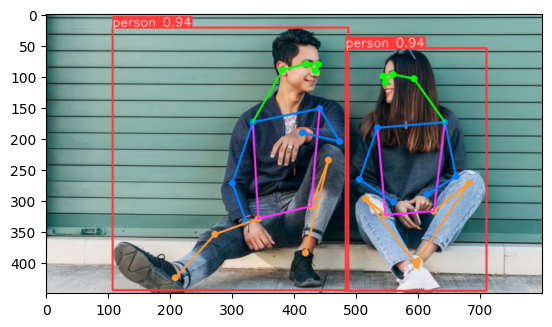

In [40]:
plt.imshow(result.plot()[:,:,::-1]);

## 오른쪽 어깨, 팔꿈치, 손목 사이의 사잇각을 구하기.
- 오른쪽 어깨 index: 6, 오른쪽 팔꿈치: 8, 오른쪽 손목: 10

In [46]:
import numpy as np
np.sign([10, -20])

array([ 1, -1])

In [2]:
import math
import numpy as np

def calc_degree(p1, p2, p3):
    ### p1: 어깨좌표, p2: 팔꿈치 좌표, p3: 손목좌표
    p1_2 = p1 - p2
    p3_2 = p3 - p2

    # a: p1과 X축간의 각도
    # b: p3와 X축간의 각도
    # p2: 원점
    a = abs(math.atan(p1_2[1]/p1_2[0])) * 180 / math.pi
    b = abs(math.atan(p3_2[1]/p3_2[0])) * 180 / math.pi

    sign1 = np.sign(p1 - p2) 
    sign2 = np.sign(p3 - p2)
    x_sign, y_sign = sign1 * sign2
    
    result = None
    if x_sign == 1 and y_sign==1: # a - b
        result = a - b

    elif x_sign == -1 and y_sign == 1: # 180 - (a + b)
        result = 180- (a + b)
        
    elif x_sign == 1 and y_sign == -1: # a + b
        result = a + b
        
    elif x_sign == -1 and y_sign == -1:

        if p1[1] < p3[1]:
            result = (180 -a) + b
        else:
            result = (180 - b) + a
            
    return result

In [75]:
img_path = "03_test_image_pose/degree/1.jpg"
img_path = "03_test_image_pose/dumbbell_curls.jpg"
img_path = "03_test_image_pose/degree/2.jpg"
model = YOLO('models/yolov8x-pose.pt')
result = model(img_path)[0]
keypoints = result.keypoints



image 1/1 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\03_test_image_pose\degree\2.jpg: 448x640 1 person, 559.3ms
Speed: 0.0ms preprocess, 559.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


In [76]:
# 세군데 좌표를 추출
import torch
r_shoulder = keypoints.xy[0, 6].type(torch.int32).numpy()
r_elbow = keypoints.xy[0, 8].type(torch.int32).numpy()
r_wrist = keypoints.xy[0, 10].type(torch.int32).numpy()
r_shoulder, r_elbow, r_wrist

(array([352, 276]), array([321, 189]), array([369, 135]))

In [77]:
degree = calc_degree(r_shoulder, r_elbow, r_wrist)
degree

118.75436695452575

In [78]:
import cv2
## 바른자세 기준: 80 ~ 90
result_label = "correct" if degree >= 80 and degree <= 90 else "wrong"
# 원본 이미지에 출력
img = result.orig_img.copy()

# 어깨 - 팔꿈치 - 손목 연결 선.
pts = np.array([r_shoulder, r_elbow, r_wrist])
img = cv2.polylines(img, [pts], isClosed=False, color=255, thickness=2, lineType=cv2.LINE_AA)
# 각도를 이미지에 그리기
degree_str = str(int(degree))
img = cv2.putText(img, degree_str, r_elbow+50, 
                        cv2.FONT_HERSHEY_COMPLEX, 1, 255, thickness=2, lineType=cv2.LINE_AA)
# 바른자세인지 여부
img = cv2.putText(img, result_label, (50, 50), 
                   cv2.FONT_HERSHEY_COMPLEX, 1, 255, thickness=2, lineType=cv2.LINE_AA)

cv2.imshow("result", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
##### 동영상

In [4]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO

cap = cv2.VideoCapture(0)
model = YOLO("models/yolov8n-pose.pt")
while cap.isOpened():

    succ, frame = cap.read()
    if not succ:
        print("캡쳐실패")
        break

    # frame = cv2.flip(frame, 1)
    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    result = model(input_img, verbose=False)[0]
    keypoints = result.keypoints
    
    r_shoulder = keypoints.xy[0, 6].type(torch.int32).numpy()
    r_elbow = keypoints.xy[0, 8].type(torch.int32).numpy()
    r_wrist = keypoints.xy[0, 10].type(torch.int32).numpy()
    degree = calc_degree(r_shoulder, r_elbow, r_wrist)

    if degree is not None:
        try:
            result_label = "correct" if degree >= 80 and degree <= 90 else "wrong"
            # 어깨 - 팔꿈치 - 손목 연결 선.
            pts = np.array([r_shoulder, r_elbow, r_wrist])
            frame = cv2.polylines(frame, [pts], isClosed=False, color=255, thickness=2, lineType=cv2.LINE_AA)
            # 각도를 이미지에 그리기
            degree_str = str(int(degree))
            frame = cv2.putText(frame, degree_str, r_elbow+50, 
                                    cv2.FONT_HERSHEY_COMPLEX, 1, 255, thickness=2, lineType=cv2.LINE_AA)
            # 바른자세인지 여부
            frame = cv2.putText(frame, result_label, (50, 50), 
                               cv2.FONT_HERSHEY_COMPLEX, 1, 255, thickness=2, lineType=cv2.LINE_AA)
        except:
            continue
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()

[339 230] [308 425]
[346 225] [311 407]
[347 226] [311 409]
[349 226] [312 413]
[349 226] [313 407]
[352 225] [296 357]
[350 227] [283 327]
[352 225] [288 319]
[353 223] [290 365]
[353 226] [298 418]
[354 226] [305 418]
[354 226] [310 416]
[354 226] [308 417]
[352 227] [303 416]
[353 227] [300 413]
[353 227] [302 407]
[353 226] [301 366]
[351 228] [297 354]
[352 225] [311 327]
[352 223] [309 332]
[349 222] [294 396]
[350 225] [275 415]
[350 223] [274 413]
[350 224] [270 414]
[350 226] [251 406]
[350 226] [250 403]
[350 225] [247 395]
[349 224] [247 394]
[350 225] [249 394]
[350 224] [249 395]
[350 224] [250 396]
[350 226] [254 400]
[350 225] [254 400]
[351 226] [249 401]
[351 226] [252 399]
[351 226] [253 399]
[350 226] [252 401]
[350 226] [252 399]
[350 226] [251 399]
[349 225] [232 386]
[350 226] [223 377]
[347 225] [196 342]
[347 224] [201 330]
[347 225] [203 319]
[405 222] [182 302]
[408 221] [197 313]
[412 221] [198 333]
[419 221] [201 349]
[430 223] [242 401]
[429 223] [267 410]
